In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [126]:
# Load the data from a .csv in the same folder
data = pd.read_csv('UseableDataDraft1.csv')

In [127]:
data

,INSTNM,SAT_AVG,ACTCMMID,ACTCM75,ADMCON7,ADM_RATE,TUITIONFEE_IN,CIP01CERT1,CIP01CERT2,CIP01ASSOC,...,C150_4_UNKN,C150_L4_WHITE,C150_L4_BLACK,C150_L4_HISP,C150_L4_ASIAN,C150_L4_AIAN,C150_L4_NHPI,C150_L4_2MOR,C150_L4_NRA,C150_L4_UNKN
0,Alabama A & M University,959.0,18.0,20.0,1.0,0.8965,10024.0,0.0,0.0,0.0,...,0.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Alabama at Birmingham,1245.0,26.0,30.0,1.0,0.8060,8568.0,0.0,0.0,0.0,...,0.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,6950.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,University of Alabama in Huntsville,1300.0,28.0,31.0,1.0,0.7711,11338.0,0.0,0.0,0.0,...,0.6923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama State University,938.0,17.0,20.0,1.0,0.9888,11068.0,0.0,0.0,0.0,...,0.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,Pennsylvania State University-Penn State Wilke...,NaN,NaN,NaN,NaN,NaN,13604.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6658,Pennsylvania State University-Penn State York,NaN,NaN,NaN,NaN,NaN,14486.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6659,Pennsylvania State University-Penn State Great...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6660,Pennsylvania State University-Penn State Harri...,NaN,NaN,NaN,NaN,NaN,15216.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# Variable to store the sat and act scores
sat_act_scores = data[["SAT_AVG", "ACTCMMID"]]
print(sat_act_scores)
print(type(sat_act_scores))

      SAT_AVG  ACTCMMID
0       959.0      18.0
1      1245.0      26.0
2         NaN       NaN
3      1300.0      28.0
4       938.0      17.0
...       ...       ...
6657      NaN       NaN
6658      NaN       NaN
6659      NaN       NaN
6660      NaN       NaN
6661      NaN       NaN

[6662 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [129]:
# Variables ot store the Admin rate and tuition fees
adminRate = data["ADM_RATE"]
tuition = data["TUITIONFEE_IN"]
print(adminRate)
print(tuition)

0       0.8965
1       0.8060
2          NaN
3       0.7711
4       0.9888
         ...  
6657       NaN
6658       NaN
6659       NaN
6660       NaN
6661       NaN
Name: ADM_RATE, Length: 6662, dtype: float64
0       10024.0
1        8568.0
2        6950.0
3       11338.0
4       11068.0
         ...   
6657    13604.0
6658    14486.0
6659        NaN
6660    15216.0
6661    14486.0
Name: TUITIONFEE_IN, Length: 6662, dtype: float64


In [130]:
# Variable to store all fields of study
fields = data.iloc[0:,7:197]
print(fields)

# 01 - Agriculture, Agriculture Operations, And Related Sciences.
# 03 - Natural Resources And Conservation.
# 04 - Architecture And Related Services.
# 05 - Area, Ethnic, Cultural, Gender, And Group Studies.
# 09 - Communication, Journalism, And Related Programs.
# 10 - Communications Technologies/Technicians And Support Services.
# 11 - Computer And Information Sciences And Support Services.
# 12 - Personal And Culinary Services.
# 13 - Education.
# 14 - Engineering.
# 15 - Engineering Technologies And Engineering-Related Fields.
# 16 - Foreign Languages, Literatures, And Linguistics.
# 19 - Family And Consumer Sciences/Human Sciences.
# 22 - Legal Professions And Studies.
# 23 - English Language And Literature/Letters.
# 24 - Liberal Arts And Sciences, General Studies And Humanities.
# 25 - Library Science.
# 26 - Biological And Biomedical Sciences.
# 27 - Mathematics And Statistics.
# 29 - Military Technologies And Applied Sciences.
# 30 - Multi/Interdisciplinary Studies.
# 31 - Parks, Recreation, Leisure, And Fitness Studies.
# 38 - Philosophy And Religious Studies.
# 39 - Theology And Religious Vocations.
# 40 - Physical Sciences.
# 41 - Science Technologies/Technicians.
# 42 - Psychology.
# 43 - Homeland Security, Law Enforcement, Firefighting And Related Protective Services.
# 44 - Public Administration And Social Service Professions.
# 45 - Social Sciences.
# 46 - Construction Trades.
# 47 - Mechanic And Repair Technologies/Technicians.
# 48 - Precision Production.
# 49 - Transportation And Materials Moving.
# 50 - Visual And Performing Arts.
# 51 - Health Professions And Related Programs.
# 52 - Business, Management, Marketing, And Related Support Services.
# 54 - History.


      CIP01CERT1  CIP01CERT2  CIP01ASSOC  CIP01CERT4  CIP01BACHL  CIP03CERT1  \
0            0.0         0.0         0.0         0.0         1.0         0.0   
1            0.0         0.0         0.0         0.0         0.0         0.0   
2            0.0         0.0         0.0         0.0         0.0         0.0   
3            0.0         0.0         0.0         0.0         0.0         0.0   
4            0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
6657         NaN         NaN         NaN         NaN         NaN         NaN   
6658         NaN         NaN         NaN         NaN         NaN         NaN   
6659         NaN         NaN         NaN         NaN         NaN         NaN   
6660         NaN         NaN         NaN         NaN         NaN         NaN   
6661         NaN         NaN         NaN         NaN         NaN         NaN   

      CIP03CERT2  CIP03ASSOC  CIP03CERT

In [131]:
# Variable to store race information
races = data.iloc[0:,197:]
print(races)
print(type(races))

      C150_4  C150_L4  C150_4_WHITE  C150_4_BLACK  C150_4_HISP  C150_4_ASIAN  \
0     0.2866      NaN        0.3182        0.2815       0.5000        1.0000   
1     0.6117      NaN        0.6056        0.5924       0.7143        0.7405   
2     0.2500      NaN        0.5000        0.0000          NaN           NaN   
3     0.5714      NaN        0.5838        0.4783       0.5313        0.4400   
4     0.3177      NaN        0.3333        0.3219       0.2857        0.0000   
...      ...      ...           ...           ...          ...           ...   
6657     NaN      NaN           NaN           NaN          NaN           NaN   
6658     NaN      NaN           NaN           NaN          NaN           NaN   
6659     NaN      NaN           NaN           NaN          NaN           NaN   
6660     NaN      NaN           NaN           NaN          NaN           NaN   
6661     NaN      NaN           NaN           NaN          NaN           NaN   

      C150_4_AIAN  C150_4_NHPI  C150_4_

In [132]:
# sample student
# Four Year, Hispanic, Psychology, 3.8 GPA, 1046 SAT, 21 ACT
s = ['4', 'HISP', 'CIP42', '3.8', 1051, 20.8]

# Get the appropriate fields and race data for the student
studentRace = races["C150_" + s[0] + "_" + s[1]] 
#print(singleRace)

fieldIndex = fields.columns.get_loc(s[2]+"CERT1")
studentFields = fields.iloc[0:,fieldIndex:fieldIndex+5]
#print(studentFields)

# Combine all the dataframes into one
# viable_schools = pd.concat([sat_act_scores, adminRate, tuition, singleRace, studentFields], ignore_index=True)
#viable_schools = sat_act_scores.append(adminRate)
viable_schools = sat_act_scores.join(adminRate)
viable_schools = viable_schools.join(tuition)
viable_schools = viable_schools.join(singleRace)
viable_schools = viable_schools.join(studentFields)
print(viable_schools) 

# Filter any schools without values in nessesary indexes 
for idx, row in viable_schools.iterrows():
    # Delete any rows that don't have an admission rate, tuition fee, or Completion Rate for Hispanics
    if(np.isnan(row['ADM_RATE']) or np.isnan(row['TUITIONFEE_IN']) or np.isnan(row["C150_" + s[0] + "_" + s[1]])):
        viable_schools = viable_schools.drop([idx])
        
    # Delete any rows that have a 0 or NaN in all field columns
    elif((row[s[2]+"CERT1"] == 0.0 or np.isnan(row[s[2]+"CERT1"])) and (row[s[2]+"CERT2"] == 0.0 or np.isnan(row[s[2]+"CERT2"])) and
         (row[s[2]+"ASSOC"] == 0.0 or np.isnan(row[s[2]+"ASSOC"])) and (row[s[2]+"CERT4"] == 0.0 or np.isnan(row[s[2]+"CERT4"])) and
         (row[s[2]+"BACHL"] == 0.0 or np.isnan(row[s[2]+"BACHL"]))):
        viable_schools = viable_schools.drop([idx])
print(viable_schools)


      SAT_AVG  ACTCMMID  ADM_RATE  TUITIONFEE_IN  C150_4_HISP  CIP42CERT1  \
0       959.0      18.0    0.8965        10024.0       0.5000         0.0   
1      1245.0      26.0    0.8060         8568.0       0.7143         0.0   
2         NaN       NaN       NaN         6950.0          NaN         0.0   
3      1300.0      28.0    0.7711        11338.0       0.5313         0.0   
4       938.0      17.0    0.9888        11068.0       0.2857         0.0   
...       ...       ...       ...            ...          ...         ...   
6657      NaN       NaN       NaN        13604.0          NaN         NaN   
6658      NaN       NaN       NaN        14486.0          NaN         NaN   
6659      NaN       NaN       NaN            NaN          NaN         NaN   
6660      NaN       NaN       NaN        15216.0          NaN         NaN   
6661      NaN       NaN       NaN        14486.0          NaN         NaN   

      CIP42CERT2  CIP42ASSOC  CIP42CERT4  CIP42BACHL  
0            0.0    

In [133]:
# Go through all the viable schools and get the admission difficulty and student "satisfaction rate"
adminDif = [] # Lower numbers mean easier to be admitted
stuSatis = [] # lower numbers mean lower student satisfaction for university

for idx, row in viable_schools.iterrows():
    valA = 0
    # SAT_AVG is NaN then ACTCMMID is NaN
    if(np.isnan(row['SAT_AVG'])):
        valA = row['ADM_RATE']
        # adminDif.append(row['ADM_RATE'])
    # Have completely average scores with 100% admission be equal ot 1
    else:
        #adminDif.append((row['SAT_AVG']/1059 * row['ACTCMMID']/20) * (1-row['ADM_RATE']))
        valA = (row['SAT_AVG']/1059 * row['ACTCMMID']/20) * (1-row['ADM_RATE'])
    
    #stuSatis.append(row['C150_4_HISP'] * row['TUITIONFEE_IN'])
    valB = (row['C150_4_HISP'] * row['TUITIONFEE_IN'])
    
    if (not(np.isnan(valA)) and not(np.isnan(valB))):

        adminDif.append(valA)
        stuSatis.append(valB)
    
# print(adminDif)    
# print(stuSatis)

for val in adminDif:
    if(np.isnan(val)):
        print("BadA")

for val in stuSatis:
    if(np.isnan(val)):
        print("BadB")

# Have likelyhood of admission paired against student statisfaction (of filtered options)
adminDif = pd.Series(adminDif)
stuSatis = pd.Series(stuSatis)

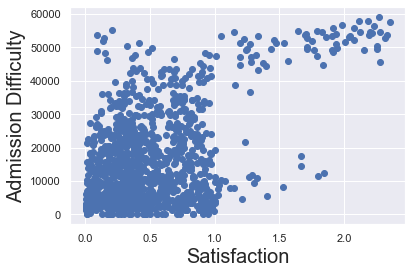

In [134]:
# Plot the data
plt.scatter(adminDif,stuSatis)
# Name the axes
plt.xlabel('Satisfaction', fontsize = 20)
plt.ylabel('Admission Difficulty', fontsize = 20)
# Show the plot
plt.show()

In [135]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(adminDif)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y 
# and an idependent x
results = sm.OLS(stuSatis,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

C:\Users\Bowen Waugh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     475.8
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           5.72e-90
Time:                        15:17:40   Log-Likelihood:                -13873.
No. Observations:                1285   AIC:                         2.775e+04
Df Residuals:                    1283   BIC:                         2.776e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6741.5849    519.540     12.976      0.000    5722.343    7760.827
0           1.747e+04    801.109     21.812      0.000    1.59e+04     1.9e+04
==============================================================================
Omnibus:                       81.266   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.400
Skew:                           0.647   Prob(JB):                     1.92e-21
Kurtosis:                       3.326   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0       0.084354
1       0.296496
2       0.393388
3       0.008432
4       0.315482
          ...   
1280    0.195965
1281    0.010879
1282    0.167943
1283    0.775610
1284    0.331860
Length: 1285, dtype: float64
0        8215.248686
1       11921.365665
2       13614.075042
3        6888.896427
4       12253.057618
            ...     
1280    10165.101616
1281     6931.645385
1282     9675.554438
1283    20291.497044
1284    12539.171676
Length: 1285, dtype: float64


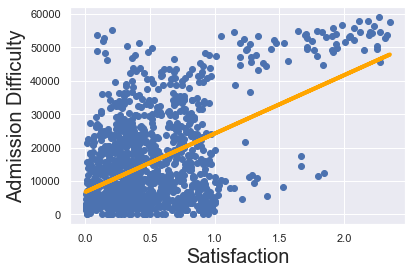

In [136]:
# Create a scatter plot
plt.scatter(adminDif,stuSatis)
# Define the regression equation, so we can plot it later
yhat = 17470*adminDif + 6741.5849
print(adminDif)
print(yhat)
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(adminDif,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('Satisfaction', fontsize = 20)
plt.ylabel('Admission Difficulty', fontsize = 20)
plt.show()